#**Project Aim**


1: I will create an and analyis a fictional portfolio, visuilze findings and explain them consisely**

2: Extract data from yahoo finance to allow for real world analysis of stocks(ticks) within the portfiolo, and the optimize the portfiolo**

3: I will then use features to train and test a ML model to predict future stock prices and use multiple modeles and metrics to attempt to get the best model

#**Porfiolo creation + Visulizations**  

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [ ]:
#creating a stock portfiolo optimizer to try to maxsimize potentiol returns why keeping volitity down
#gonna use

In [ ]:
port  = ['VUSA.AS','IWO','URE','XLK','QQQ', 'VOO', 'IYT'] #tickers

end_date = datetime.today()# end date
start_date = end_date - timedelta(days = 10*365) # strats date to 7 years ago

print (f'The start for this portfiolo is {start_date}, and the end date is {end_date}')

The start for this portfiolo is 2013-11-26 21:09:42.433430, and the end date is 2023-11-24 21:09:42.433430


Using adj as we get the devided close price also

In [ ]:
adj_df = pd.DataFrame()

for ticker in port:
  data = yf.download(ticker, start=start_date, end = end_date) #taking data from yfinance from our specified dates and tickers
  adj_df[ticker] = data[['Adj Close']] #extracting

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
adj_df #adj close price for each stock

,VUSA.AS,IWO,URE,XLK,QQQ,VOO,IYT
Date,,,,,,,
2013-11-26,25.344999,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-27,25.379999,123.702141,30.881741,30.073959,78.086967,138.557770,116.099098
2013-11-28,25.355000,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-29,25.360001,123.869522,30.280748,30.195814,78.554253,138.357407,115.795280
2013-12-02,25.400000,122.809616,29.950869,30.100063,78.325211,138.140305,115.973976
...,...,...,...,...,...,...,...
2023-11-20,78.695000,225.300003,51.799999,185.449997,390.739990,417.429993,241.339996
2023-11-21,78.665001,222.570007,51.380001,183.949997,388.470001,416.339996,241.289993
2023-11-22,79.599998,224.169998,51.680000,184.770004,390.059998,418.140015,242.669998


In [ ]:
adj_df = adj_df.dropna() #gettring rid of missing rows with information
adj_df

,VUSA.AS,IWO,URE,XLK,QQQ,VOO,IYT
Date,,,,,,,
2013-11-27,25.379999,123.702141,30.881741,30.073959,78.086967,138.557770,116.099098
2013-11-29,25.360001,123.869522,30.280748,30.195814,78.554253,138.357407,115.795280
2013-12-02,25.400000,122.809616,29.950869,30.100063,78.325211,138.140305,115.973976
2013-12-03,25.125000,121.833366,29.878565,30.169706,78.261070,137.605972,114.830322
2013-12-04,25.230000,121.526596,30.018646,30.195814,78.334328,137.447296,114.321060
...,...,...,...,...,...,...,...
2023-11-17,78.599998,223.600006,51.070000,182.800003,386.040009,414.309998,239.770004
2023-11-20,78.695000,225.300003,51.799999,185.449997,390.739990,417.429993,241.339996
2023-11-21,78.665001,222.570007,51.380001,183.949997,388.470001,416.339996,241.289993


Now to Visualize the best performing tickers over time

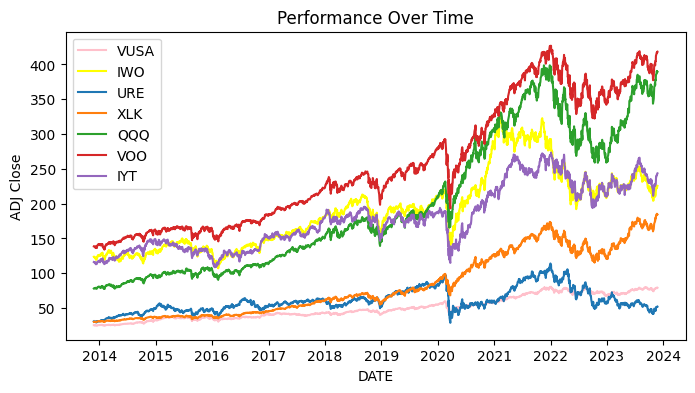

In [ ]:
#VUSA.AS	IWO	URE	XLK	QQQ	VOO	IYT

plt.figure(figsize=(8, 4))
plt.plot(adj_df['VUSA.AS'], label='VUSA', color='pink')
plt.plot(adj_df['IWO'], label='IWO', color='yellow')
plt.plot(adj_df['URE'], label='URE')
plt.plot(adj_df['XLK'], label='XLK')
plt.plot(adj_df['QQQ'], label='QQQ')
plt.plot(adj_df['VOO'], label='VOO')
plt.plot(adj_df['IYT'], label='IYT')
plt.title('Performance Over Time')
plt.xlabel('DATE')
plt.ylabel('ADJ Close')

plt.legend()
plt.show()

Daily Returns for each ticker

In [ ]:
returns = np.log(adj_df / adj_df.shift(1)) #daily returns current adj close/ by the following day to result in the day rate
returns

,VUSA.AS,IWO,URE,XLK,QQQ,VOO,IYT
Date,,,,,,,
2013-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-29,-0.000788,0.001352,-0.019653,0.004044,0.005966,-0.001447,-0.002620
2013-12-02,0.001576,-0.008593,-0.010954,-0.003176,-0.002920,-0.001570,0.001542
2013-12-03,-0.010886,-0.007981,-0.002417,0.002311,-0.000819,-0.003876,-0.009910
2013-12-04,0.004170,-0.002521,0.004677,0.000865,0.000936,-0.001154,-0.004445
...,...,...,...,...,...,...,...
2023-11-17,0.001681,0.012873,-0.004494,-0.002077,0.000233,0.001473,0.006486
2023-11-20,0.001208,0.007574,0.014193,0.014393,0.012101,0.007502,0.006527
2023-11-21,-0.000381,-0.012191,-0.008141,-0.008121,-0.005826,-0.002615,-0.000207


In [ ]:
#Dropping missing falues
returns = returns.dropna()
missing = returns.isnull().sum().sum()
print(f'We now have {missing} missing values in our returns')

We now have 0 missing values in our returns


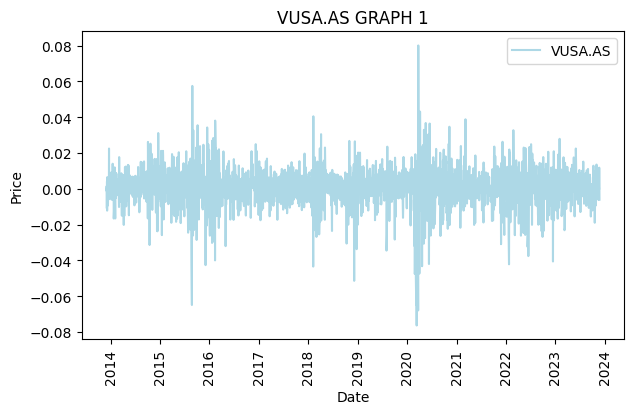

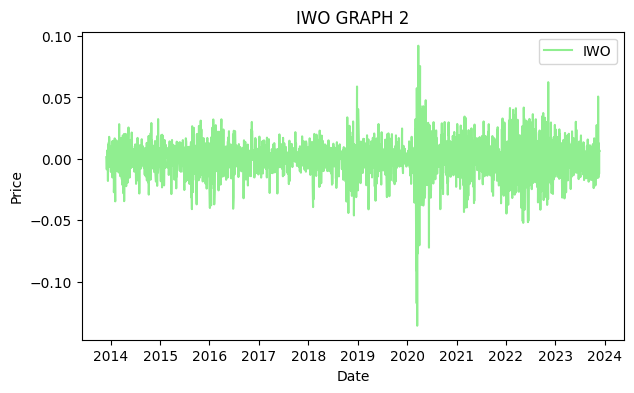

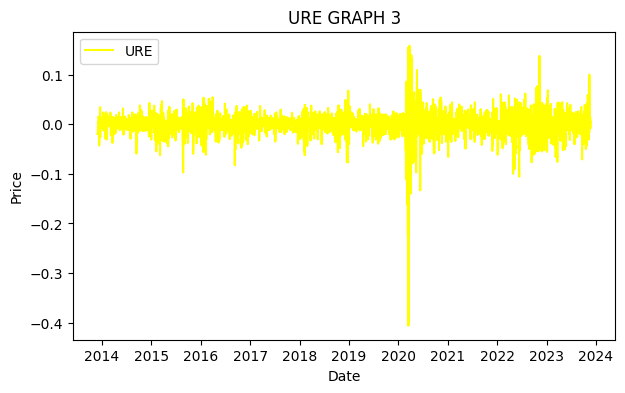

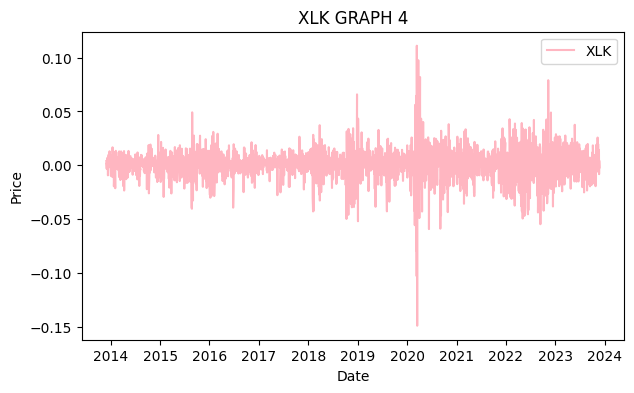

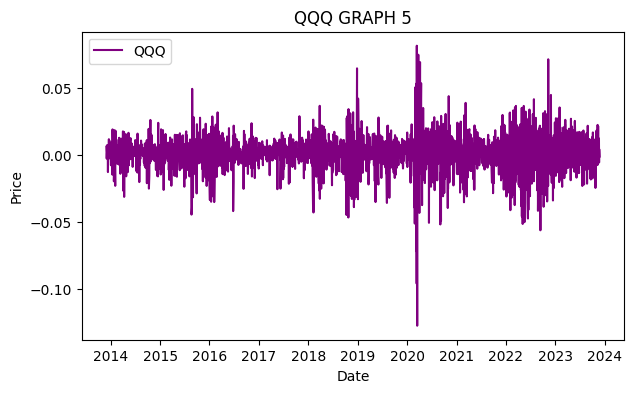

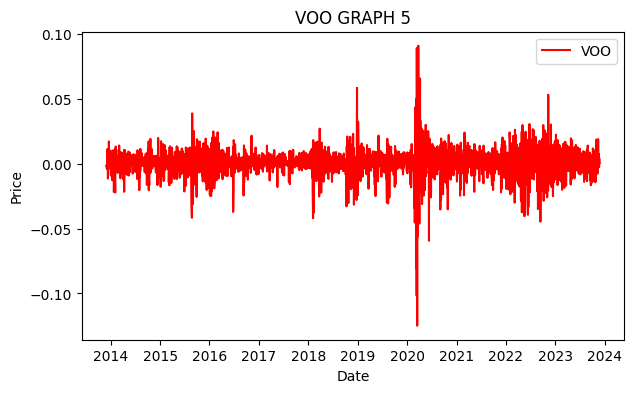

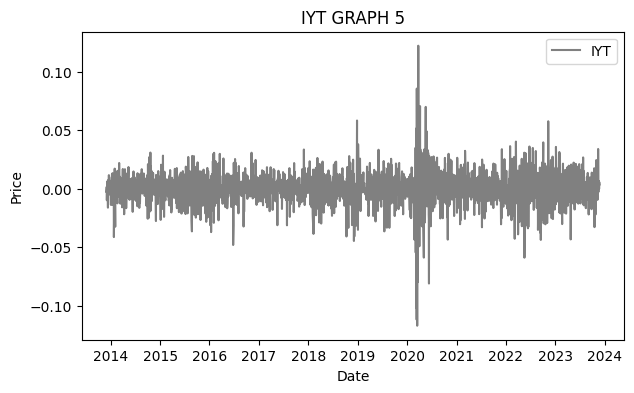

In [ ]:
#VUSA.AS	IWO	URE	XLK	QQQ	VOO	IYT

plt.figure(figsize=(7, 4))
plt.plot(returns['VUSA.AS'], color='lightblue', label='VUSA.AS')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VUSA.AS GRAPH 1')
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(returns['IWO'], color='lightgreen', label='IWO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IWO GRAPH 2')
plt.legend()
plt.show()#

plt.figure(figsize=(7, 4))
plt.plot(returns['URE'], color='yellow', label='URE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('URE GRAPH 3')
plt.legend()
plt.show()#

plt.figure(figsize=(7, 4))
plt.plot(returns['XLK'], color='lightpink', label='XLK')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XLK GRAPH 4')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(returns['QQQ'], color='purple', label='QQQ')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('QQQ GRAPH 5')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(returns['VOO'], color='red', label='VOO')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('VOO GRAPH 5')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(returns['IYT'], color='gray', label='IYT')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IYT GRAPH 5')
plt.legend()
plt.show()

From the graph above we can see which years had the best perfoming days, we can also see a trend in the year 2020 for having great day returns and also supbstatial drops .....(talk about potential reasons why, maybe covid or other things)

In [ ]:
# Now to use describe to see which stock on avrage had the best day returns
returns.describe()

,VUSA.AS,IWO,URE,XLK,QQQ,VOO,IYT
count,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000,2491.000000
mean,0.000456,0.000241,0.000209,0.000728,0.000645,0.000444,0.000297
std,0.010769,0.014709,0.025635,0.014318,0.013657,0.011244,0.014068
min,-0.076316,-0.135881,-0.406344,-0.148663,-0.127592,-0.124870,-0.117292
25%,-0.004450,-0.007225,-0.010641,-0.005430,-0.005024,-0.003765,-0.006624
50%,0.000865,0.001065,0.001566,0.001101,0.001148,0.000625,0.000793
75%,0.006176,0.008409,0.012596,0.007739,0.007508,0.005762,0.007903
max,0.080087,0.092082,0.158470,0.110932,0.081309,0.091087,0.122314


Based on the results we can see that the XLK has the highest average daily  returns

#**Standard deviation & Optimization.**

##**(covariance matrix) How assests move with oneother - The higher the value the more the assests move together**

In [ ]:
#allows ust to calcute risk in the most optimal way
matrix = returns.cov()*252 #annual trading days in a year/ cov functionn calculates the mean alto
matrix #printing out the results of how the daily returns of assets move togther

,VUSA.AS,IWO,URE,XLK,QQQ,VOO,IYT
VUSA.AS,0.029227,0.019662,0.028808,0.019324,0.018369,0.017037,0.019329
IWO,0.019662,0.054524,0.063983,0.042978,0.041916,0.036099,0.041445
URE,0.028808,0.063983,0.165607,0.058895,0.054784,0.055084,0.059412
XLK,0.019324,0.042978,0.058895,0.051661,0.048061,0.037823,0.036701
QQQ,0.018369,0.041916,0.054784,0.048061,0.046999,0.035878,0.034581
VOO,0.017037,0.036099,0.055084,0.037823,0.035878,0.031862,0.033546
IYT,0.019329,0.041445,0.059412,0.036701,0.034581,0.033546,0.049874


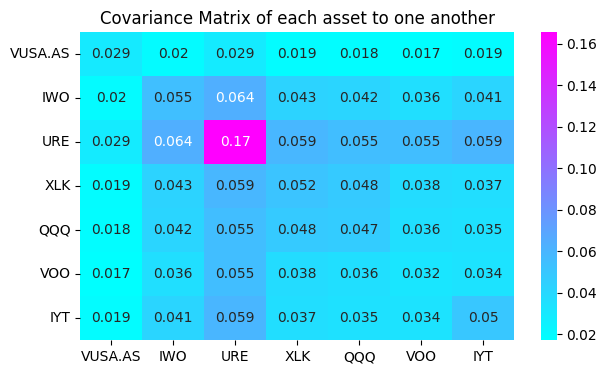

In [ ]:
import seaborn as sns



plt.figure(figsize=(7, 4))
sns.heatmap(matrix, annot=True, cmap='cool')
plt.title('Covariance Matrix of each asset to one another')
plt.show()

From the graph, we can see that URE and IWO move together the most, we can also see that tickets like IWO and VUSA have a low covariance overall as they seem to not move with any other assests

Standerd deviation (risk of this portfiolo)

In [ ]:
def standerddev(weights, matrix): #function for standerd deveation
  varince = weights.T @ matrix @ weights #transposing and multiplying the weights by the convince matrix
  return np.sqrt(varince) #sqr the varince to get the standerd devation

Expected return

In [ ]:
#expected return on past data annualy

def expectedreturn(weights, returns):
  return np.sum(returns.mean()*weights)*252 # avarge of the daily returns - multby by number of trading days in a year/ sum of assests and their daily returns

Sharp Ratio

In [ ]:
#Expected return - riskfreerate/standerd devation- if the ratio is high, we get more bang for our buck ( indicates that the investment has provided a better return for the amount of risk taken,)
def sharp(weights, returns, matrix, risk_free_rate):
  return(expectedreturn (weights, returns) - risk_free_rate) / standerddev(weights, matrix)

Calculating risk free rate

In [ ]:
!pip install fredapi #instaling fred api to use thier api to calculate the risk free rate

In [ ]:
 from fredapi import Fred

 fred = Fred(api_key='c45b3b03379ea92a1543b02ce906ddd4') #Using the API to get US T bonds are its a good measure for a low-risk investment
 treasury_rate = fred.get_series_latest_release('GS10') / 100 #Extracting the latest 10 year T-bond yeild / by 100 to make it a decimal for future calculations

 risk_free_rate = treasury_rate.iloc[-1] #extracting the latest value to use as the risk free rate
 print(risk_free_rate) #risk free rate

0.048


In [ ]:
treasury_rate #risk free rates/yeilds for the past 10years (US treasury bond)

1953-04-01    0.0283
1953-05-01    0.0305
1953-06-01    0.0311
1953-07-01    0.0293
1953-08-01    0.0295
               ...  
2023-06-01    0.0375
2023-07-01    0.0390
2023-08-01    0.0417
2023-09-01    0.0438
2023-10-01    0.0480
Length: 847, dtype: float64

Function to minize negtive sharp ratio

In [ ]:
def neg_sharp_ratio(weights, returns, matrix, risk_free_rate):
  return -sharp(weights, returns, matrix, risk_free_rate) # negtive value of the sharp ratio

Bonds and Contraints

In [ ]:
cons = {'type':'eq','fun': lambda weights: np.sum(weights)- 1} #making sure weights add up to 1 (100%) type=equality contraint fun checks if the weights = 1
bonds = [(0,0.5) for _ in range(len(port))] #0 lower bound - we cant sell any assets only pursahse - 0.5 upper bound to stop having over 50% of our port in a single stock

weighting port

In [ ]:
startweights = np.array([1/len(port)]*len(port)) #splitting the weights of the assets equally
startweights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

Optimizing the weights - explain what is happening here

In [ ]:
optimized = minimize(neg_sharp_ratio, startweights, args=(returns, matrix, risk_free_rate), method='SLSQP', constraints=cons, bounds=bonds) #mimising the negtive sharp ratio which intern maximuize the sharp ratio - using the optimization method Sequential Least Squares Quadratic Programming
opt_weights = optimized.x #extracting the asset weights that resulted in the minimal negtive sharp ratio
opt_weights

array([3.54473719e-01, 2.44596010e-16, 0.00000000e+00, 5.00000000e-01,
       1.45526281e-01, 0.00000000e+00, 0.00000000e+00])

In [ ]:
print ('Optimal weights')
for ticker, weight in zip(port, opt_weights):
  per = weight * 100
  print(f'{ticker}:{per:.2f}%')
print()

opt_port_return = expectedreturn(opt_weights, returns)
expected = opt_port_return * 100

exp_vol = standerddev(opt_weights, matrix)
risk = exp_vol * 100

opt_sharp = sharp(opt_weights, returns, matrix, risk_free_rate)

print(f'Expected annual return {expected:.2f}%')
print(f'Expected Volatility/Risk {risk:.2f}%')
print(f'Shape ratio {opt_sharp:.3f}')

Optimal weights
VUSA.AS:35.45%
IWO:0.00%
URE:0.00%
XLK:50.00%
QQQ:14.55%
VOO:0.00%
IYT:0.00%

Expected annual return 15.62%
Expected Volatility/Risk 18.25%
Shape ratio 0.593


Visulization

Text(0.5, 1.0, 'Optimal weights')

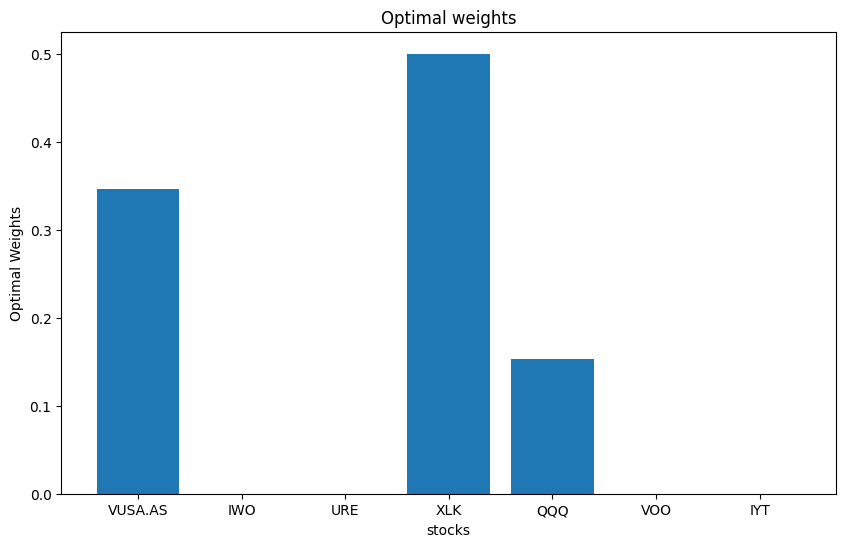

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(port, opt_weights)
plt.xlabel('stocks')
plt.ylabel('Optimal Weights')
plt.title('Optimal weights')


#**Machine learning models to try and predict Adj closing price of each stock**

In [ ]:
from sklearn import linear_model
import numpy as np
import warnings
import seaborn as sns
#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
adj_dff = pd.DataFrame()

for ticker in port:
    #Extraction
    data = yf.download(ticker, start=start_date, end=end_date)

    # extracting and adding Relevent features for prediction to our new datatset
    adj_dff[ticker + '_Open'] = data['Open']
    adj_dff[ticker + '_High'] = data['High']
    adj_dff[ticker + '_Low'] = data['Low']
    adj_dff[ticker + '_Close'] = data['Close']
    adj_dff[ticker + '_Volume'] = data['Volume']
    adj_dff[ticker + '_ADJ Close'] = data['Adj Close']


adj_dff

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,VUSA.AS_Open,VUSA.AS_High,VUSA.AS_Low,VUSA.AS_Close,VUSA.AS_Volume,VUSA.AS_ADJ Close,IWO_Open,IWO_High,IWO_Low,IWO_Close,...,VOO_Low,VOO_Close,VOO_Volume,VOO_ADJ Close,IYT_Open,IYT_High,IYT_Low,IYT_Close,IYT_Volume,IYT_ADJ Close
Date,,,,,,,,,,,,,,,,,,,,,
2013-11-25,25.469999,25.530001,25.434999,25.504999,21906,25.504999,131.490005,131.570007,130.699997,131.050003,...,165.259995,165.570007,810000.0,138.248825,129.270004,129.490005,128.869995,129.210007,174300.0,115.446861
2013-11-26,25.400000,25.410000,25.344999,25.344999,16137,25.344999,131.050003,132.669998,131.020004,132.399994,...,165.289993,165.490005,773300.0,138.182022,129.330002,129.449997,128.770004,129.029999,62300.0,115.286026
2013-11-27,25.340000,25.379999,25.280001,25.379999,23420,25.379999,132.589996,133.220001,132.130005,133.050003,...,165.509995,165.940002,826300.0,138.557800,129.000000,130.000000,129.000000,129.940002,94800.0,116.099068
2013-11-28,25.309999,25.389999,25.309999,25.355000,17755,25.355000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-29,25.350000,25.389999,25.325001,25.360001,1791207,25.360001,133.720001,133.919998,133.139999,133.229996,...,165.649994,165.699997,614400.0,138.357422,130.130005,130.399994,129.440002,129.600006,152600.0,115.795334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-16,78.809998,78.866997,78.378998,78.468002,49634,78.468002,223.130005,223.600006,219.770004,220.740005,...,411.750000,413.700012,3798900.0,413.700012,239.149994,239.610001,236.199997,238.220001,158200.0,238.220001
2023-11-17,79.098000,79.175003,78.469002,78.599998,37560,78.599998,222.880005,223.880005,222.020004,223.600006,...,412.869995,414.309998,4696200.0,414.309998,239.410004,239.789993,237.970001,239.770004,111200.0,239.770004
2023-11-20,78.418999,78.695000,78.330002,78.695000,32563,78.695000,223.770004,225.750000,223.100006,225.300003,...,413.980011,417.429993,3517600.0,417.429993,239.539993,242.169998,238.479996,241.339996,82100.0,241.339996


## Linear and Random Forest models for each stock

Well measure how well the model preformes by measureing how wrong it is on avarage(The lower the better) we will also use other metrics. Were aiming ofr adj closing price beacuse of coprate functions such as divedens ect

In [ ]:
adj_dff.isnull().sum().sum() #dropping rows with missing data
adj_dff = adj_dff.dropna() #dropping rows with missing data

In [ ]:
adj_dff.describe() # based on the information below we can see that the largest amount for adj close price is £464, this is important as we can compare it to our loss function

,VUSA.AS_Open,VUSA.AS_High,VUSA.AS_Low,VUSA.AS_Close,VUSA.AS_Volume,VUSA.AS_ADJ Close,IWO_Open,IWO_High,IWO_Low,IWO_Close,...,VOO_Low,VOO_Close,VOO_Volume,VOO_ADJ Close,IYT_Open,IYT_High,IYT_Low,IYT_Close,IYT_Volume,IYT_ADJ Close
count,2493.000000,2493.000000,2493.000000,2493.000000,2.493000e+03,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,...,2493.000000,2493.000000,2.493000e+03,2493.000000,2493.000000,2493.000000,2493.000000,2493.000000,2.493000e+03,2493.000000
mean,49.972080,50.233873,49.705034,49.985197,1.171422e+05,49.985197,195.546394,197.116895,193.729792,195.496346,...,271.776438,273.402591,3.222638e+06,254.919243,188.467052,189.907154,187.000201,188.479868,2.694632e+05,178.922206
std,16.248961,16.340489,16.156579,16.253056,1.280807e+05,16.253056,51.967057,52.477304,51.294457,51.884041,...,81.398411,82.026718,2.329860e+06,88.983715,41.131414,41.453082,40.804132,41.127746,1.900955e+05,44.165674
min,24.549999,24.666000,24.421000,24.572001,5.228000e+03,24.572001,111.510002,113.839996,111.510002,113.059998,...,159.179993,159.610001,3.279000e+05,133.997223,117.690002,120.320000,114.910004,118.910004,2.570000e+04,108.575500
25%,36.695000,36.867001,36.556999,36.655998,5.269800e+04,36.655998,148.630005,149.600006,147.630005,148.860001,...,193.210007,193.850006,1.736700e+06,167.486755,151.960007,152.910004,151.020004,151.910004,1.429000e+05,138.273590
50%,45.782001,45.930000,45.539001,45.731998,8.194900e+04,45.731998,194.059998,195.589996,192.389999,194.100006,...,254.039993,255.669998,2.698800e+06,234.302872,185.100006,187.190002,183.759995,185.639999,2.195000e+05,174.437485
75%,65.962997,66.127998,65.693001,65.957001,1.391470e+05,65.957001,224.100006,225.919998,222.089996,224.009995,...,352.299988,355.350006,3.933900e+06,345.323792,221.929993,223.660004,219.690002,221.779999,3.428000e+05,217.418259
max,80.666000,80.963997,80.199997,80.478996,2.872428e+06,80.478996,339.089996,339.910004,334.100006,336.630005,...,437.660004,439.250000,2.466930e+07,426.925964,280.480011,282.399994,278.489990,279.970001,1.491400e+06,273.358032


In [ ]:
max = adj_dff['VOO_ADJ Close'].max()
min = adj_dff['VUSA.AS_ADJ Close'].min()

print(f'The max adj close {max} from VOO, and the min adj close is {min} from VUSA') #if we get predictions on the lower end it means that are models are performing well

The max adj close 426.92596435546875 from VOO, and the min adj close is 24.57200050354004 from VUSA


###VOO ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['VOO_High', 'VOO_Open', 'VOO_Low','VOO_Volume']]
y = adj_dff['VOO_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model = LinearRegression()
model.fit(x_train,y_train) #training the model

y_pred1 = model.predict(x_test)
Model1MSE = mean_absolute_error(y_test, y_pred1) #measuring how off the model is on avarge
acur = r2_score(y_test, y_pred1)
acurp= acur * 100

print(f'The avarge that the linear model is off by for predicting VOO closing price is {Model1MSE} and the accuracy % is {acurp:.2f}')

#//

x = adj_dff[['VOO_High', 'VOO_Open', 'VOO_Low','VOO_Volume']]
y = adj_dff['VOO_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model22 = RandomForestRegressor()
model22.fit(x_train,y_train) #training the model
y_pred2 = model22.predict(x_test)

Model1MSE2 = mean_absolute_error(y_test, y_pred2)
accuracy = r2_score(y_test, y_pred2)
accuracy_per = accuracy * 100

print(f'The avarge amount that the random forest model is off by for predicting VOO closing price is {Model1MSE2}, and the accuracy % is {accuracy_per:.2f}%')

The avarge that the linear model is off by for predicting VOO closing price is 2.6271642078667172 and the accuracy % is 99.84
The avarge amount that the random forest model is off by for predicting VOO closing price is 2.4879306094488784, and the accuracy % is 99.84%


Based on the results of the model we can conclude that the relationship between models are not really linear linear hence why the random forest model preformed better

### VUSA ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['VUSA.AS_High', 'VUSA.AS_Open', 'VUSA.AS_Low','VUSA.AS_Volume']]
y = adj_dff['VUSA.AS_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model3 = LinearRegression()
model3.fit(x_train,y_train) #training the model

y_pred3 = model3.predict(x_test)
ModelMSE3 = mean_absolute_error(y_test, y_pred3) #measuring how off the model is on avarge
acure = r2_score(y_test, y_pred3)
acurpp= acure * 100


print(f'The avarge that the linear model is off by for predicting VUSA closing price is {ModelMSE3}, {acurpp:.2f}%')

#//

x = adj_dff[['VUSA.AS_High', 'VUSA.AS_Open', 'VUSA.AS_Low','VUSA.AS_Volume']]
y = adj_dff['VUSA.AS_ADJ Close']#first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model44 = RandomForestRegressor()
model44.fit(x_train,y_train) #training the model
y_pred4 = model44.predict(x_test)

ModelMSE4 = mean_absolute_error(y_test, y_pred4)
acu = r2_score(y_test, y_pred4) #accurcy
acur = acu * 100

print(f'The avarge amount that the random forest model is off by for predicting VUSA closing price is {ModelMSE4}. {acur:.2f}%')  #very good results, this means that the linear is only of an avarage of $0.05

The avarge that the linear model is off by for predicting VUSA closing price is 0.10807226033679553, 99.99%
The avarge amount that the random forest model is off by for predicting VUSA closing price is 0.17172187774597025. 99.98%


### IWO ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['IWO_High', 'IWO_Open', 'IWO_Low','IWO_Volume']]
y = adj_dff['IWO_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model5 = LinearRegression()
model5.fit(x_train,y_train) #training the model

y_pred5 = model5.predict(x_test)
ModelMSE5 = mean_absolute_error(y_test, y_pred5) #measuring how off the model is on avarge
accuu = r2_score(y_test, y_pred5)

accuu2 = accuu * 100

print(f'The avarge that the linear model is off by for predicting IWO closing price is {ModelMSE5}, {accuu2:.2f}%')

#//

x = adj_dff[['IWO_High', 'IWO_Open', 'IWO_Low','IWO_Volume']]
y = adj_dff['IWO_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model6 = RandomForestRegressor()
model6.fit(x_train,y_train) #training the model
y_pred6 = model6.predict(x_test)

ModelMSE6 = mean_absolute_error(y_test, y_pred6)
acurr2 = r2_score(y_test, y_pred6)
acurpp = acurr2 * 100


print(f'The avarge amount that the random forest model is off by for predicting IWO closing price is {ModelMSE6}, {acurpp:.2f}%')

The avarge that the linear model is off by for predicting IWO closing price is 1.478278505484668, 99.86%
The avarge amount that the random forest model is off by for predicting IWO closing price is 1.3606310102504808, 99.89%


### IYT ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['IYT_High', 'IYT_Open', 'IYT_Low','IYT_Volume']]
y = adj_dff['IYT_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model7 = LinearRegression()
model7.fit(x_train,y_train) #training the model

y_pred7 = model7.predict(x_test)
ModelMSE7 = mean_absolute_error(y_test, y_pred7) #measuring how off the model is on avarge
acur1 = r2_score(y_test, y_pred7)
acurp2 = acur * 100


print(f'The avarge that the linear model is off by for predicting IYT closing price is {ModelMSE7} and the % is {acurp2:.2f}%')

#//

x = adj_dff[['IYT_High', 'IYT_Open', 'IYT_Low','IYT_Volume']]
y = adj_dff['IYT_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model8 = RandomForestRegressor()
model8.fit(x_train,y_train) #training the model
y_pred8 = model8.predict(x_test)

ModelMSE8 = mean_absolute_error(y_test, y_pred8)
acur = r2_score(y_test, y_pred8)
acurpp= acur * 100


print(f'The avarge amount that the random forest model is off by for predicting IYT closing price is {ModelMSE8}, {acurpp:.2f}%') #linear model performed better here however over all the model didnt perfome that well compared to other stocks


The avarge that the linear model is off by for predicting IYT closing price is 2.185183141796429 and the % is 9997.84%
The avarge amount that the random forest model is off by for predicting IYT closing price is 1.917167254736524, 99.68%


### QQQ ADJ CLOSE PREDICTION  

In [ ]:
x = adj_dff[['QQQ_High', 'QQQ_Open', 'QQQ_Low','QQQ_Volume']]
y = adj_dff['QQQ_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model9 = LinearRegression()
model9.fit(x_train,y_train) #training the model

y_pred9 = model9.predict(x_test)
ModelMSE9 = mean_absolute_error(y_test, y_pred9) #measuring how off the model is on avarge
acurry = r2_score(y_test, y_pred9)
accu = acurry * 100


print(f'The avarge that the linear model is off by for predicting SPY closing price is {ModelMSE9}, and the % {accu:.2f}%')

#//

x = adj_dff[['QQQ_High', 'QQQ_Open', 'QQQ_Low','QQQ_Volume']]
y = adj_dff['QQQ_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model10 = RandomForestRegressor()
model10.fit(x_train,y_train) #training the model
y_pred10 = model10.predict(x_test)

acurr = r2_score(y_test, y_pred10)
acu= acurr * 100


ModelMSE10 = mean_absolute_error(y_test, y_pred10)

print(f'The avarge amount that the random forest model is off by for predicting SPY closing price is {ModelMSE10}, the % is {acu:.2f}%') #another very well perfomind model based on the low error return


The avarge that the linear model is off by for predicting SPY closing price is 1.1020310680817995, and the % 99.97%
The avarge amount that the random forest model is off by for predicting SPY closing price is 1.2926548548451882, the % is 99.96%


### URE ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['URE_High', 'URE_Open', 'URE_Low','URE_Volume']] #VUSA.AS	IWO	URE	XLK	QQQ	VOO	IYT
y = adj_dff['URE_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model11 = LinearRegression()
model11.fit(x_train,y_train) #training the model

y_pred11 = model11.predict(x_test)
ModelMSE11 = mean_absolute_error(y_test, y_pred11) #measuring how off the model is on avarge
acurry = r2_score(y_test, y_pred11)
accu = acurry * 100


print(f'The avarge that the linear model is off by for predicting URE closing price is {ModelMSE11}, and the % {accu:.2f}%')

#//

x = adj_dff[['URE_High', 'URE_Open', 'URE_Low','URE_Volume']]
y = adj_dff['URE_ADJ Close']  #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model12 = RandomForestRegressor()
model12.fit(x_train,y_train) #training the model
y_pred12 = model12.predict(x_test)

acurr = r2_score(y_test, y_pred12)
acu= acurr * 100


ModelMSE12 = mean_absolute_error(y_test, y_pred12)

print(f'The avarge amount that the random forest model is off by for predicting URE closing price is {ModelMSE12}, the % is {acu:.2f}%')

The avarge that the linear model is off by for predicting URE closing price is 1.0621546156261212, and the % 99.42%
The avarge amount that the random forest model is off by for predicting URE closing price is 0.6581020812758943, the % is 99.74%


### XLK ADJ CLOSE PREDICTION

In [ ]:
x = adj_dff[['XLK_High', 'XLK_Open', 'XLK_Low','XLK_Volume']] #VUSA.AS	IWO	URE	XLK	QQQ	VOO	IYT
y = adj_dff['XLK_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=43)

model13 = LinearRegression()
model13.fit(x_train,y_train) #training the model

y_pred13 = model13.predict(x_test)
ModelMSE13 = mean_absolute_error(y_test, y_pred13) #measuring how off the model is on avarge
acurry = r2_score(y_test, y_pred13)
accu = acurry * 100


print(f'The avarge that the linear model is off by for predicting URE closing price is {ModelMSE13}, and the % {accu:.2f}%')

#//

x = adj_dff[['XLK_High', 'XLK_Open', 'XLK_Low','XLK_Volume']] #VUSA.AS	IWO	URE	XLK	QQQ	VOO	IYT
y = adj_dff['XLK_ADJ Close'] #first lets visulize what type of correlation we have with these features

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model14 = RandomForestRegressor()
model14.fit(x_train,y_train) #training the model
y_pred14 = model14.predict(x_test)

acurr = r2_score(y_test, y_pred14)
acu= acurr * 100


ModelMSE14 = mean_absolute_error(y_test, y_pred14)

print(f'The avarge amount that the random forest model is off by for predicting URE closing price is {ModelMSE14}, the % is {acu:.2f}%')

The avarge that the linear model is off by for predicting URE closing price is 0.5426441866540298, and the % 99.97%
The avarge amount that the random forest model is off by for predicting URE closing price is 0.629056262090832, the % is 99.96%


The Modles preformed really well on the test train split when it comes to predicting adj close price based on the features given. We can use these predictions to assess potential returns and risks associated with holding or trading these assets.

## Testing models on new indivuial stock data and comparing with actual adj stock prices

In [ ]:
#Testing the  model on some new unseen data We're using real data from the date Nov 21 2023

### VOO Test

In [ ]:
new_data = pd.DataFrame() #creating new data based on real data found n yahoo finance

new_data['Date'] = ['Nov 21, 2023', 'Nov 20, 2023', 'Nov 17, 2023']
new_data['VOO_Open'] = [416.40, 413.99, 413.94]  #opening prices
new_data['VOO_High'] = [416.84, 418.20, 414.79]
new_data['VOO_Low'] = [415.30, 413.98,412.87]
new_data['VOO_Close'] = [416.34, 417.43,414.31]
new_data['VOO_Volume'] = [5246000, 3517600, 4696200]
new_data['VOO_ADJ Close'] = [416.34, 417.43, 414.31]  # Example adjusted closing prices

new_data

,Date,VOO_Open,VOO_High,VOO_Low,VOO_Close,VOO_Volume,VOO_ADJ Close
0,"Nov 21, 2023",416.40,416.84,415.30,416.34,5246000,416.34
1,"Nov 20, 2023",413.99,418.20,413.98,417.43,3517600,417.43
2,"Nov 17, 2023",413.94,414.79,412.87,414.31,4696200,414.31


In [ ]:
x = new_data[['VOO_High', 'VOO_Open', 'VOO_Low','VOO_Volume']]

predictedclosespy = model22.predict(x) #testing the model that gave the best result

#lets add the predicted adj close to the orginal data

new_data['Predicted Adj Close'] = predictedclosespy

new_data

,Date,VOO_Open,VOO_High,VOO_Low,VOO_Close,VOO_Volume,VOO_ADJ Close,Predicted Adj Close
0,"Nov 21, 2023",416.40,416.84,415.30,416.34,5246000,416.34,407.844516
1,"Nov 20, 2023",413.99,418.20,413.98,417.43,3517600,417.43,415.238881
2,"Nov 17, 2023",413.94,414.79,412.87,414.31,4696200,414.31,413.072343


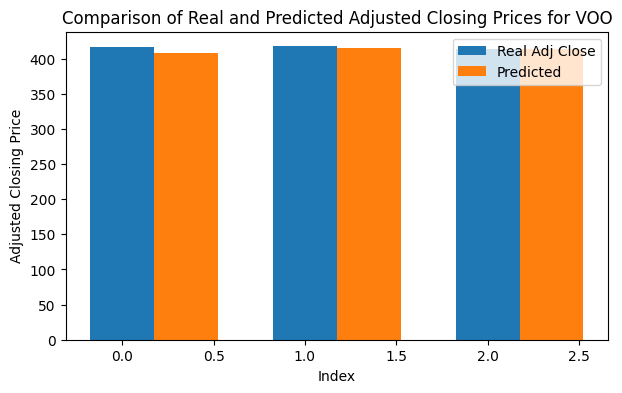

In [ ]:
dates = new_data.index

# Bar width for the grouped bar plot
bar_width = 0.35

# Plotting the real and predicted values side by side
plt.figure(figsize=(7, 4))
plt.bar(dates, new_data['VOO_ADJ Close'], width=bar_width, label='Real Adj Close')
plt.bar(dates + bar_width, new_data['Predicted Adj Close'], width=bar_width, label='Predicted')


plt.xlabel('Index')
plt.ylabel('Adjusted Closing Price')
plt.title('Comparison of Real and Predicted Adjusted Closing Prices for VOO')
plt.legend()

# Display the plot
plt.show()

### VUSA.AS Test

In [ ]:
VUSA_data = pd.DataFrame()

VUSA_data['Date'] = ['Nov 21, 2023','Nov 20, 2023','Nov 17, 2023']
VUSA_data['VUSA.AS_Open'] = ['78.73','78.42','79.10']
VUSA_data['VUSA.AS_High'] = ['78.87','78.69','79.18']
VUSA_data['VUSA.AS_Low'] =  ['78.51','78.33','78.47']
VUSA_data['VUSA.AS_Close'] = ['78.67','78.69','78.60']
VUSA_data['VUSA.AS_Volume'] = ['31875','32563','37560']
VUSA_data['VUSA.AS_ADJ Close'] = ['78.67','78.69','78.60']

#Date	SPY_Open	SPY_High	SPY_Low	SPY_Close	SPY_Volume	SPY_ADJ Close	Predicted Adj Close

VUSA_data

,Date,VUSA.AS_Open,VUSA.AS_High,VUSA.AS_Low,VUSA.AS_Close,VUSA.AS_Volume,VUSA.AS_ADJ Close
0,"Nov 21, 2023",78.73,78.87,78.51,78.67,31875,78.67
1,"Nov 20, 2023",78.42,78.69,78.33,78.69,32563,78.69
2,"Nov 17, 2023",79.10,79.18,78.47,78.60,37560,78.60


In [ ]:
xnew = VUSA_data[['VUSA.AS_High', 'VUSA.AS_Open', 'VUSA.AS_Low','VUSA.AS_Volume']]

bndpred = model44.predict(xnew)

VUSA_data['VUSA.AS Prediction'] = bndpred

VUSA_data


,Date,VUSA.AS_Open,VUSA.AS_High,VUSA.AS_Low,VUSA.AS_Close,VUSA.AS_Volume,VUSA.AS_ADJ Close,VUSA.AS Prediction
0,"Nov 21, 2023",78.73,78.87,78.51,78.67,31875,78.67,78.729531
1,"Nov 20, 2023",78.42,78.69,78.33,78.69,32563,78.69,78.559581
2,"Nov 17, 2023",79.10,79.18,78.47,78.60,37560,78.60,78.653639


### QQQ test

Lets test the best model preidtion on the ticker QQQ

In [ ]:
qqq_data = pd.DataFrame()

qqq_data['Date'] = ['Nov 21, 2023','Nov 20, 2023','Nov 17, 2023']
qqq_data['QQQ_Open'] = ['389.01','386.05','385.21']
qqq_data['QQQ_High'] = ['389.23','391.41','387.07']
qqq_data['QQQ_Low'] =  ['386.70	','386.05','384.29	']
qqq_data['QQQ_Close'] = ['387.83','390.74','386.04']
qqq_data['QQQ_Volume'] = ['27245381','44429600','46571900']
qqq_data['QQQ_ADJ Close'] = ['387.83','390.74','386.04']

#Date	SPY_Open	SPY_High	SPY_Low	SPY_Close	SPY_Volume	SPY_ADJ Close	Predicted Adj Close

qqq_data

,Date,QQQ_Open,QQQ_High,QQQ_Low,QQQ_Close,QQQ_Volume,QQQ_ADJ Close
0,"Nov 21, 2023",389.01,389.23,386.70\t,387.83,27245381,387.83
1,"Nov 20, 2023",386.05,391.41,386.05,390.74,44429600,390.74
2,"Nov 17, 2023",385.21,387.07,384.29\t,386.04,46571900,386.04


In [ ]:
#Testing
xnew3 = qqq_data[['QQQ_High', 'QQQ_Open', 'QQQ_Low','QQQ_Volume']]

qqq_pred = model8.predict(xnew3)

qqq_data['QQQ Prediction'] = qqq_pred

qqq_data


,Date,QQQ_Open,QQQ_High,QQQ_Low,QQQ_Close,QQQ_Volume,QQQ_ADJ Close,QQQ Prediction
0,"Nov 21, 2023",389.01,389.23,386.70\t,387.83,27245381,387.83,384.610561
1,"Nov 20, 2023",386.05,391.41,386.05,390.74,44429600,390.74,388.509637
2,"Nov 17, 2023",385.21,387.07,384.29\t,386.04,46571900,386.04,383.607640


**All the models performed really well on the new unseen data that i extracted from yahoo finance for those three days**